In [17]:
from astropy.io import fits
from glob import glob
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from jwst import datamodels
from itertools import product
import itertools
from astropy.wcs import WCS
import math
from IPython.display import display
from visualization_helpers import *
from astropy.utils.data import download_file
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import pandas as pd

## Data Products Counting

In [21]:
directory = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/'

In [18]:
pids = [pid.split('/')[-1] for pid in glob('/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/*')]

In [22]:
suffixes = ['rateints','calints','i2d','psfstack','psfalign','psfsub']

In [57]:
count_list = []
rows_list = []

In [58]:
for id in pids:
    count_list = []
    for suffix in suffixes:

        if suffix in ['rateints','calints']:
            count_list.append(len(glob(f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/{id}/mastDownload/JWST/*/*{suffix}.fits')))

        else:
            count_list.append(len(glob(f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/{id}/mastDownload/JWST/*{suffix}.fits')))
            
        
    rows_list.append(count_list)
    del count_list
    

In [59]:
df = pd.DataFrame(data=rows_list,columns = suffixes,index = pids)

In [61]:
df.to_csv('data_table.csv')

# PSF STACK

In [2]:
#hdu = fits.open(psfstacks_nircam[2])[1]

In [3]:
#w = WCS(naxis=2)
#w.wcs.crpix = [hdu.header['CRPIX1'],hdu.header['CRPIX2']]
#w.wcs.crval = [hdu.header['CRVAL1'], hdu.header['CRVAL2']]
#w.wcs.cunit = ['deg', 'deg']

In [4]:
#wcs_header = w.to_header()
#hdu.header.update(wcs_header)

In [5]:
#wcs = WCS(hdu.header,naxis=2)
#fig = plt.figure(figsize=(6,12))
#fig.add_subplot(111, projection=wcs)
#plt.imshow(hdu.data[0],clim=(0,255),cmap='gray')
#plt.xlabel('RA')
#plt.ylabel('Dec')

In [6]:
PROPOSAL_ID = '1386'
directory_1386_nircam = f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/{PROPOSAL_ID}/mastDownload/JWST/'

In [7]:
psfstacks_nircam_1386 = get_stage3_products(suffix='psfstack',directory=directory_1386_nircam)

In [8]:
world_coords, axis_points = pixel2wcs(psfstacks_nircam_1386[0],ispsf=True)
header_psfstacks_1386,sci_psfstacks_1386,err_psfstacks_1386,dq_psfstacks_1386,_,_ = get_hdu(psfstacks_nircam_1386,data='psf')
filtrs_1386      = get_headers(header_psfstacks_1386,'FILTER')
instrume_1386    = get_headers(header_psfstacks_1386,'INSTRUME')
targprop_1386    = get_headers(header_psfstacks_1386,'TARGPROP')
program_1386     = get_headers(header_psfstacks_1386,'PROGRAM')
coronmsk_1386    = get_headers(header_psfstacks_1386,'CORONMSK')

Set OBSGEO-B to   -35.239445 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706645115.209 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [9]:
for i in range(len(filtrs_1386)):
    imh = fits.open(psfstacks_nircam_1386[i])[1].header
    data_sb = fits.open(psfstacks_nircam_1386[i])[1].data
    data = data_sb / imh['PHOTMJSR']
    print(imh['PIXAR_A2'])
    #print('Conversion factor from {units} to DN/s for filter {f}:'.format(units=imh['BUNIT'], f=filtrs[i]), imh['PHOTMJSR'])

0.00396
0.00396
0.00396
0.00396
0.00396


In [10]:
times = RA2time(world_coords[0])
x_labels = create_axis_label(times,fixed=1)
y_labelish = ['.' + str(round(y_label,3)) for y_label in world_coords[1]]
y_labels = create_declination_labels(y_labelish)

In [11]:
arcsec_pixel = np.sqrt(imh['PIXAR_A2'])

In [12]:
y_labels

['.102', '.-42.101', '.099']

In [13]:
arcsec_pixel*16

1.0068564942433456

16 pixel is 1 arcsec

In [14]:
x_labels

[15.0, '13:58:16.1', 17.3]

In [15]:
#y_labels[2] = y_labels[2][1:]
#y_labels[4] = '99'
#y_labels[3] = '100'

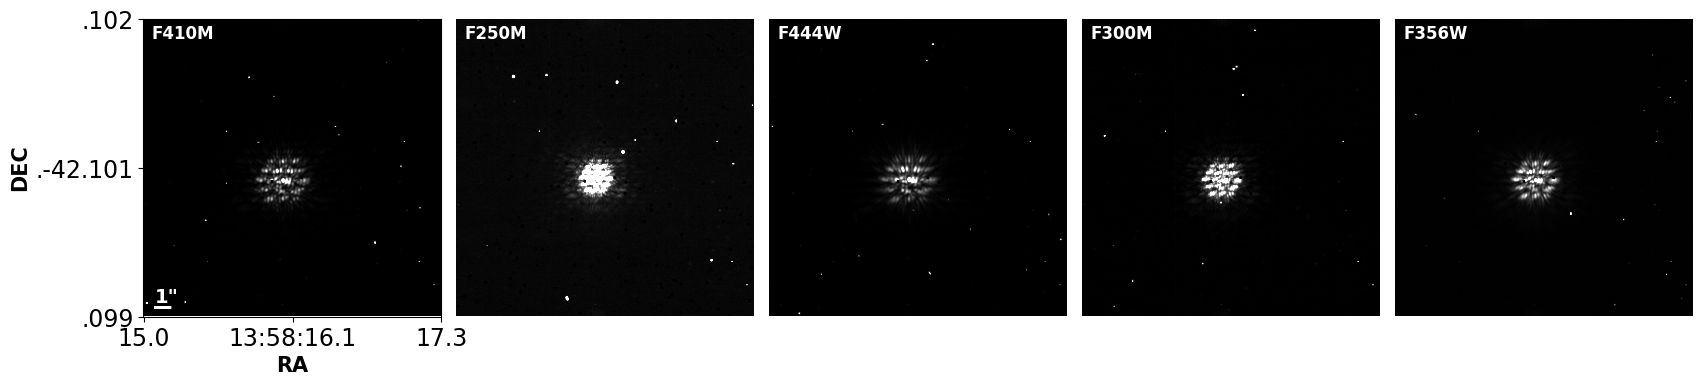

In [17]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,5,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
x, y = [10, 26], [310, 310]

for i in range(len(sci_psfstacks_1386)):

    axs[i].set_xlabel('RA',fontsize=15,fontweight='bold',color='black')
    axs[i].set_ylabel('DEC',fontsize=15,fontweight='bold',color='black')
   
    
    axs[i].text(8, 21, f'{filtrs_1386[i]}',fontsize=12,color='white',fontweight='bold')
    axs[i].imshow(sci_psfstacks_1386[i][0],cmap='gray',clim=(0,255))   
    axs[i].set_xticks(axis_points)
    axs[i].set_yticks(axis_points)
    axs[i].set_xticklabels(x_labels,fontsize=17,color='black')
    axs[i].set_yticklabels(y_labels,fontsize=17,color='black')
    
        
    if i != 0:
        axs[i].axis('off')
    
    else:
        axs[i].text(12,305,'1"',fontsize=14,color='white',fontweight='bold')
        #axs[i].plot(x, y,  marker = 'None',color='white')
        axs[i].text(11,303,'_',fontsize=25,color='white',fontweight='bold')

        
    
#fig.patch.set_facecolor('#423f3b')
#plt.text(180,20,'_',fontsize=46,color='white',fontweight='bold')

plt.subplots_adjust(wspace=0.05,hspace=0)
plt.savefig(f'NIRCAM_PSFSTACK_1386.png', dpi=300,bbox_inches='tight',pad_inches=0);

In [19]:
PROPOSAL_ID = '1441'
directory_1441_nircam = f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/{PROPOSAL_ID}/mastDownload/JWST/'

In [20]:
psfstacks_nircam_1441 = get_stage3_products(suffix='psfstack',directory=directory_1441_nircam)

In [21]:
#world_coords, axis_points = pixel2wcs(psfstacks_nircam_1441[0],ispsf=True)
header_psfstacks_1441,sci_psfstacks_1441,err_psfstacks_1441,dq_psfstacks_1441,_,_ = get_hdu(psfstacks_nircam_1441,data='psf')
filtrs_1441 = get_headers(header_psfstacks_1441,'FILTER')
instrume_1441 = get_headers(header_psfstacks_1441,'INSTRUME')
targprop_1441 = get_headers(header_psfstacks_1441,'TARGPROP')
program_1441 = get_headers(header_psfstacks_1441,'PROGRAM')
coronmsk_1441 = get_headers(header_psfstacks_1441,'CORONMSK')

In [22]:
world_coords_1, axis_points_1 = pixel2wcs(psfstacks_nircam_1441[0],ispsf=True)
world_coords_2, axis_points_2 = pixel2wcs(psfstacks_nircam_1441[1],ispsf=True)
world_coords_3, axis_points_3 = pixel2wcs(psfstacks_nircam_1441[2],ispsf=True)

Set OBSGEO-B to   -38.347517 from OBSGEO-[XYZ].
Set OBSGEO-H to 1740255124.532 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.339621 from OBSGEO-[XYZ].
Set OBSGEO-H to 1739710955.657 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.338015 from OBSGEO-[XYZ].
Set OBSGEO-H to 1739615976.243 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [23]:
labelss = []

In [24]:
times = RA2time(world_coords_1[0])
x_labels = create_axis_label(times,fixed=1)
y_labelish = [str(round(y_label,4)) for y_label in world_coords_1[1]]
y_labels = create_declination_labels(y_labelish,fixed=1)
#y_labels = ['.' + x for x in y_labels]
#y_labels[2] = y_labels[2][2:]
y_labels = y_labels[::-1]
y_labels = ['.' + x if len(x) <= 3 else x for x in y_labels]
labelss.append((x_labels,y_labels))
print(y_labels)

['.57', '1.2443', '.28']


In [25]:
times = RA2time(world_coords_2[0])
x_labels = create_axis_label(times,fixed=1)
y_labelish = [str(round(y_label,4)) for y_label in world_coords_2[1]]
y_labels = create_declination_labels(y_labelish)
#y_labels = ['.' + x for x in y_labels]
#y_labels[2] = y_labels[2][2:]
y_labels = y_labels[::-1]
y_labels = ['.' + x if len(x) <= 3 else x for x in y_labels]
labelss.append((x_labels,y_labels))
print(y_labels)

['.21', '8.2106', '.91']


In [26]:
times = RA2time(world_coords_3[0])
x_labels = create_axis_label(times,fixed=1)
y_labelish = [str(round(y_label,4)) for y_label in world_coords_3[1]]
y_labels = create_declination_labels(y_labelish)
#y_labels = ['.' + x for x in y_labels]
#y_labels[2] = y_labels[2][2:]
y_labels = y_labels[::-1]
y_labels = ['.' + x if len(x) <= 3 else x for x in y_labels]
labelss.append((x_labels,y_labels))
print(y_labels)

['.11', '8.2097', '.82']


In [ ]:
#labelss[0][1][1] = '.450'

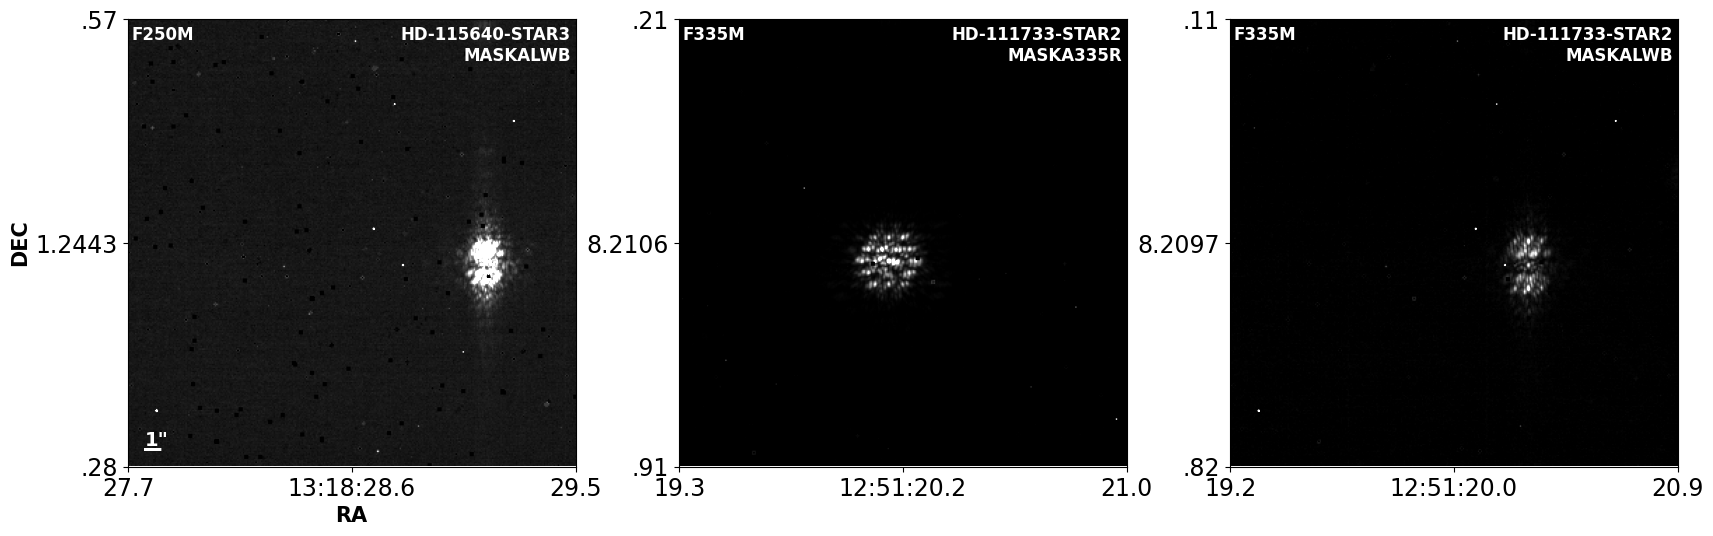

In [36]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,3,hspace=0)
axs = gs.subplots()
x, y = [10, 26], [310, 310]



axs[0].imshow(sci_psfstacks_1441[0][0],cmap='gray',clim=(0,255))
axs[0].text(240, 30, f'{coronmsk_1441[0]}',fontsize=12,color='white',fontweight='bold')
axs[0].text(195, 15, f'{targprop_1441[0]}',fontsize=12,color='white',fontweight='bold')
axs[0].text(2, 15, f'{filtrs_1441[0]}',fontsize=12,color='white',fontweight='bold')



axs[0].text(12,305,'1"',fontsize=14,color='white',fontweight='bold')
        #axs[i].plot(x, y,  marker = 'None',color='white')
axs[0].text(11,303,'_',fontsize=25,color='white',fontweight='bold')
#axs[0].text(12,305,'1"',fontsize=10,color='white',fontweight='bold')
#axs[0].plot(x, y,  marker = 'None',color='white')
axs[0].set_xlabel('RA',fontsize=15,fontweight='bold',color='black')
axs[0].set_ylabel('DEC',fontsize=15,fontweight='bold',color='black')


axs[1].imshow(sci_psfstacks_1441[1][0],cmap='gray',clim=(0,255))
axs[1].text(235, 30, f'{coronmsk_1441[1]}',fontsize=12,color='white',fontweight='bold')
axs[1].text(195, 15, f'{targprop_1441[1]}',fontsize=12,color='white',fontweight='bold')
axs[1].text(2, 15, f'{filtrs_1441[1]}',fontsize=12,color='white',fontweight='bold')
axs[1].set_xticks(axis_points_2)
axs[1].set_yticks(axis_points_2)
axs[1].set_xticklabels(labelss[1][0],fontsize=17,color='black')
axs[1].set_yticklabels(labelss[1][1],fontsize=17,color='black')  



axs[2].imshow(sci_psfstacks_1441[2][0],cmap='gray',clim=(0,255))
axs[2].text(240, 30, f'{coronmsk_1441[2]}',fontsize=12,color='white',fontweight='bold')
axs[2].text(195, 15, f'{targprop_1441[2]}',fontsize=12,color='white',fontweight='bold')
axs[2].text(2, 15, f'{filtrs_1441[2]}',fontsize=12,color='white',fontweight='bold')
axs[2].set_xticks(axis_points_3)
axs[2].set_yticks(axis_points_3)
axs[2].set_xticklabels(labelss[2][0],fontsize=17,color='black')
axs[2].set_yticklabels(labelss[2][1],fontsize=17,color='black')  

axs[0].set_xticks(axis_points_1)
axs[0].set_yticks(axis_points_1)
axs[0].set_xticklabels(labelss[0][0],fontsize=17,color='black')
axs[0].set_yticklabels(labelss[0][1],fontsize=17,color='black')  

plt.subplots_adjust(wspace=0.23,hspace=0)
plt.savefig(f'NIRCAM_PSFSTACK_1441.png', dpi=300,bbox_inches='tight',pad_inches=0);

# PCA-UMAP VISUALIZATION

In [ ]:
def pca_func(flatten_final,n_comp,pca,ncols=10):
    
    if pca == 'pca':
        dimr = PCA(n_components=n_comp)
        
    elif pca == 'tsvd':
        
        dimr = TruncatedSVD(n_components=n_comp)
        
    elif pca == 'incpca':
        
        dimr = IncrementalPCA(n_components=n_comp)
        
        
    lower_dimensional_data = dimr.fit_transform(flatten_final)
    approximation = dimr.inverse_transform(lower_dimensional_data)
    #print(pca.n_components)
    
    return approximation,lower_dimensional_data
    

In [ ]:
from glob import glob
import h5py
import os
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA, IncrementalPCA
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [ ]:
directory = f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/'

In [ ]:
h5_files = glob(os.path.join(directory,'**/*.h5'))

In [ ]:
data_1441 = h5py.File(h5_files[0],'r')
data_1386 = h5py.File(h5_files[1],'r')

In [ ]:
keys_1386 = [x for x in data_1386.keys()]
final_1386 = np.concatenate((np.array(data_1386[keys_1386[0]]),np.array(data_1386[keys_1386[1]])))

for i in range(len(keys_1386)-2):
    
    final_1386 = np.concatenate((final_1386,np.array(data_1386[keys_1386[i+2]])))
    

flatten_final_1386 = np.resize(final_1386, (final_1386.shape[0],320*320))
center_function = lambda x: x - x.mean()
centered_data_1386 = center_function(flatten_final_1386)
approx_pca_1386, lowdim_pca_1386 = pca_func(centered_data_1386,2,pca='pca')
interval_min = 0
interval_max = 1
scaled_lowdimpca = (lowdim_pca_1386 - np.min(lowdim_pca_1386)) / (np.max(lowdim_pca_1386) - np.min(lowdim_pca_1386)) * (interval_max - interval_min)  + interval_min

In [ ]:
keys_1441 = [x for x in data_1441.keys()]
final_1441 = np.concatenate((np.array(data_1441[keys_1441[0]]),np.array(data_1441[keys_1441[1]])))

for i in range(len(keys_1441)-2):
    
    final_1441 = np.concatenate((final_1441,np.array(data_1441[keys_1441[i+2]])))
    
flatten_final_1441 = np.resize(final_1441, (final_1441.shape[0],320*320))
flatten_final_1441.shape
center_function = lambda x: x - x.mean()
centered_data_1441 = center_function(flatten_final_1441)
approx_pca_1441,lowdim_pca_1441 = pca_func(centered_data_1441,2,pca='pca')
interval_min = 0
interval_max = 1
scaled_lowdimpca_1441 = (lowdim_pca_1441 - np.min(lowdim_pca_1441)) / (np.max(lowdim_pca_1441) - np.min(lowdim_pca_1441)) * (interval_max - interval_min)  + interval_min

In [ ]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(1,2)
axs = gs.subplots()


#axs[0].set_title('F250M',color='white')
axs[0].scatter(scaled_lowdimpca[:,:1],scaled_lowdimpca[:,1:2])
#axs[0].xticks(color='black')
#axs[0].yticks(color='black')
#axs[0].title('PCA',color='black')
axs[0].set_xlabel('$pc_1$',fontsize=30,fontweight='bold',color='black')
axs[0].set_ylabel('$pc_2$',fontsize=30,fontweight='bold',color='black')
axs[0].text(-0.02, 1.01,'PID 1386',fontsize=12,color='black',fontweight='bold')
axs[0].set_yticks([])
axs[0].set_xticks([])


#axs[1].set_title('F300M',color='white')
axs[1].scatter(scaled_lowdimpca_1441[:,:1],scaled_lowdimpca_1441[:,1:2])
#axs[1].xticks(color='black')
#axs[1].yticks(color='black')
#axs[1].title('PCA',color='black')
axs[1].set_xlabel('$pc_1$',fontsize=30,fontweight='bold',color='black')
axs[1].set_ylabel('$pc_2$',fontsize=30,fontweight='bold',color='black')
axs[1].text(0.909, 0.0555, 'PID 1441',fontsize=12,color='black',fontweight='bold')
axs[1].set_yticks([])
axs[1].set_xticks([]);

plt.savefig(f'PCA_LATENTS.png', dpi=300,bbox_inches='tight',pad_inches=0);

In [ ]:
import umap
import umap.plot

In [ ]:
def map_1386_classes(n):
    
    if n == 0:
        return 'F410M'
    elif n == 1:    
        return 'F250M'
    elif n == 2:
        return 'F444W'
    elif n == 3:
        return 'F300M'
    elif n == 4:
        return 'F356W'

In [ ]:
keys_1386 = [x for x in data_1386.keys()]
final_1386 = np.concatenate((np.array(data_1386[keys_1386[0]]),np.array(data_1386[keys_1386[1]])))

for i in range(len(keys_1386)-2):
    
    final_1386 = np.concatenate((final_1386,np.array(data_1386[keys_1386[i+2]])))
    

flatten_final_1386 = np.resize(final_1386, (final_1386.shape[0],320*320))
mapper_1386 = umap.UMAP().fit(flatten_final_1386)

q = np.zeros(36)
w = np.ones(36)
r = np.ones(18) * 2
t = np.ones(18) * 3
y = np.ones(18) * 4

classes_1386 = np.hstack((q, w, r, t, y))
detector_classes_1386 = np.array([x for x in map(map_1386_classes,classes_1386)])

umap.plot.points(mapper_1386,labels=detector_classes_1386);
plt.savefig(f'UMAP_1386.png', dpi=300,bbox_inches='tight',pad_inches=0);

In [ ]:
def map_1441_classes(n):
    
    if n == 0:
        return 'F250M LWB'
    elif n == 1:    
        return 'F355M 335R'
    elif n == 2:
        return 'F355M LWB'
        

In [ ]:
keys_1441 = [x for x in data_1441.keys()] # get list of keys for each psfstack
f = np.concatenate((np.array(data_1441[keys_1441[0]]),np.array(data_1441[keys_1441[1]]))) 
final_1441 = np.concatenate((f,np.array(data_1441[keys_1441[2]])))
flatten_final_1441 = np.resize(final_1441, (final_1441.shape[0],320*320))
mapper_1441 = umap.UMAP().fit(flatten_final_1441)

a = np.zeros(189) # class0
b = np.ones(240)  # class1
c = np.ones(240) * 2 # class2

classes_1441 = np.hstack((a, b, c))
detector_classes_1441 = np.array([x for x in map(map_1441_classes,classes_1441)])

umap.plot.points(mapper_1441,labels=detector_classes_1441,color_key=['r','b','g']);
plt.savefig(f'UMAP_1441.png', dpi=300,bbox_inches='tight',pad_inches=0);